# wednesday class

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing .image import ImageDataGenerator
%matplotlib inline

In [2]:
train_path="A:/AI/Neural network/dataset/Train1"

In [3]:
val_path="A:/AI/Neural network/dataset/Test1"

In [4]:
val_datagen=ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               brightness_range=(0.8,1.5),
                               rotation_range=45)

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               brightness_range=(0.8,1.5),
                               rotation_range=45)

In [6]:
train_generator=train_datagen.flow_from_directory(train_path,target_size=(224,224),class_mode="categorical",color_mode="rgb")

Found 1100 images belonging to 2 classes.


In [7]:
validation_generator=val_datagen.flow_from_directory(train_path,target_size=(224,224),class_mode="categorical",color_mode="rgb")

Found 1100 images belonging to 2 classes.


# New slection

In [8]:
steps=len("train_generator")
print(steps)

15


# Defining a model

In [9]:
model=tf.keras.models.Sequential()

# adding layers

In [10]:
#Adding the first convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))

In [11]:
#Adding the second convolutional layer 
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

In [12]:
#adding 3rd convolutional network
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [13]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

# Adding flatten layer

In [14]:
model.add(tf.keras.layers.Flatten())

# Adding first fully connected layer

In [15]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Adding the output layer

In [16]:
model.add(tf.keras.layers.Dense(units=1,activation="softmax"))

In [17]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [18]:
history=model.fit(train_generator,
         epochs=10,
         validation_data=validation_generator)

Epoch 1/10
35/35 [==============================] - 141s 4s/step - loss: 1.8808 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
35/35 [==============================] - 142s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
35/35 [==============================] - 159s 5s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
35/35 [==============================] - 141s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
35/35 [==============================] - 140s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
35/35 [==============================] - 140s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
35/35 [==============================] - 140s 4s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
35

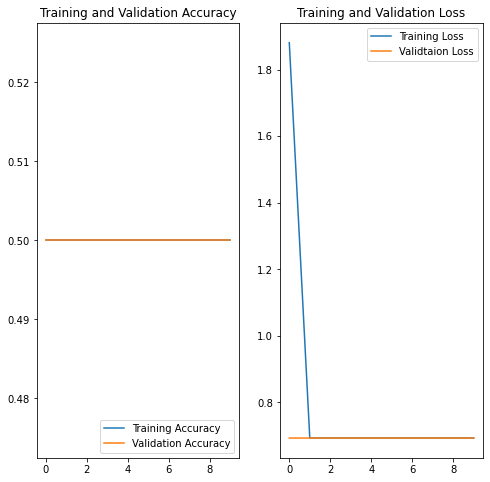

In [19]:
epochs=10
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training Accuracy")
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validtaion Loss")
plt.legend(loc="upper right")
plt.title('Training and Validation Loss')
plt.show()